In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
      "PlantVillage",
       shuffle = True,
       image_size = (IMAGE_SIZE,IMAGE_SIZE),
       batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [14]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [17]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 2 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 2 0 0 0 0 0 0 0 0]


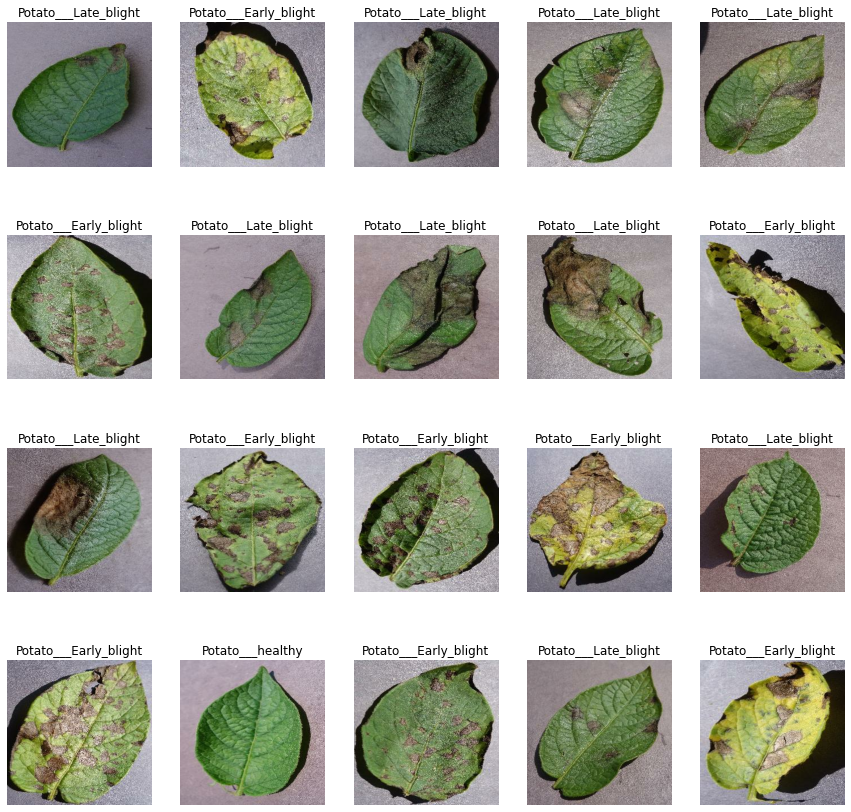

In [29]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(20):
        ax = plt.subplot(4,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [31]:
#As it is in batches our dataset size is 68*32 batches

len(dataset)

68

In [56]:
#Splitting of data into 80%,10%,10%

train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [33]:
train_dataset = dataset.take(54)

In [36]:
test_dataset = dataset.skip(54)
len(test_dataset)

14

In [37]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [38]:
val_dataset = test_dataset.take(6)

In [39]:
test_dataset = test_dataset.skip(6)
len(test_dataset)

8

In [42]:
#54 batches of data is used for training

len(train_dataset)

54

In [43]:
#6 batches of data is used for validation data

len(val_dataset)

6

In [45]:
#8 batches data is used for test data

len(test_dataset)

8

In [46]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [54]:
#For resizing and rescaling our images

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [55]:
#For data augmentation like flipping of single image to various kinds

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [61]:
#Building CNN Model

CHANNELS = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=input_shape)

In [62]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_7 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [64]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [65]:
history = model.fit(train_dataset, epochs = 50, batch_size=BATCH_SIZE,validation_data = val_dataset,verbose=1)

Epoch 1/50
54/54 [==============================] - 83s 2s/step - loss: 0.9206 - accuracy: 0.4745 - val_loss: 0.8557 - val_accuracy: 0.4792
Epoch 2/50
54/54 [==============================] - 79s 1s/step - loss: 0.7340 - accuracy: 0.6580 - val_loss: 0.5073 - val_accuracy: 0.8229
Epoch 3/50
54/54 [==============================] - 80s 1s/step - loss: 0.4751 - accuracy: 0.8084 - val_loss: 0.4860 - val_accuracy: 0.7865
Epoch 4/50
54/54 [==============================] - 81s 1s/step - loss: 0.3474 - accuracy: 0.8576 - val_loss: 0.2487 - val_accuracy: 0.9167
Epoch 5/50
54/54 [==============================] - 80s 1s/step - loss: 0.3277 - accuracy: 0.8634 - val_loss: 0.3363 - val_accuracy: 0.8542
Epoch 6/50
54/54 [==============================] - 80s 1s/step - loss: 0.2651 - accuracy: 0.8958 - val_loss: 0.2850 - val_accuracy: 0.8750
Epoch 7/50
54/54 [==============================] - 82s 2s/step - loss: 0.2199 - accuracy: 0.9155 - val_loss: 0.2783 - val_accuracy: 0.8802
Epoch 8/50
54/54 [==

In [67]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [68]:
scores = model.evaluate(test_dataset)

8/8 [==============================] - 3s 231ms/step - loss: 0.1635 - accuracy: 0.9526


In [71]:
EPOCHS = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

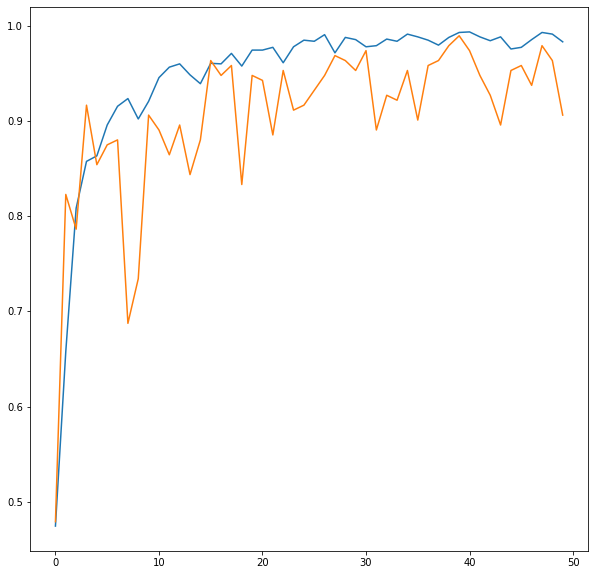

In [72]:
plt.figure(figsize=(10,10))
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc , label = 'Validation_accuracy')

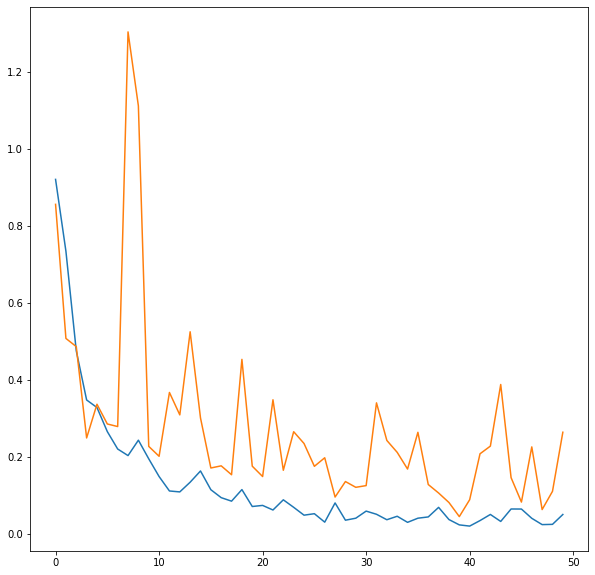

In [73]:
plt.figure(figsize=(10,10))
plt.plot(range(EPOCHS), loss, label = 'Training loss')
plt.plot(range(EPOCHS), val_loss , label = 'Validation_loss')

actual_label Potato___Late_blight


AttributeError: 'NoneType' object has no attribute 'predict'

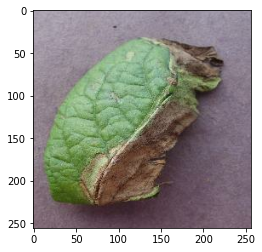

In [84]:
#Predictions on Test data(Single prediction)

for image_batch, labels_batch in test_dataset.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    plt.imshow(first_image)
    print("actual_label",class_names[first_label])
    
    prediction = model.predict(image_batch)
    print("Prediction label",class_names[np.argmax(prediction[0])])

In [82]:
import os

model = model.save('Potatoes.h5')